In [1]:
import librosa
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import os
np.__version__

'1.24.3'

In [14]:
##spectrogram
def wav2spec(wavesig):
    n_mels=150
    soundSampleFreq=24414
    fmax=1000
    fmin=20
    n_fft=2270
    hop_length=int(n_fft/4)
    print(hop_length)
    wavetemp=np.squeeze(wavesig)
    convertedArray = wavetemp.astype(np.float64)
    #fig=plt.figure(dpi=600)
    spectro = librosa.feature.melspectrogram(y=convertedArray,n_mels=80,sr=soundSampleFreq, n_fft=n_fft, hop_length=hop_length)
    ##draw with f0
    f0, voiced_flag, voiced_probs = librosa.pyin(convertedArray,fmin=50,fmax=300)
    times = librosa.times_like(f0)
    h=librosa.power_to_db(spectro, ref=np.max)
    #fig, ax = plt.subplots(dpi=400)
    #img = librosa.display.specshow(h, x_axis='time', y_axis='log', ax=ax)
    #ax.set(title='pYIN fundamental frequency estimation')
    #fig.colorbar(img, ax=ax, format="%+2.f dB")
    #ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
    #ax.legend(loc='upper right')
    return(h)
    ##draw without f0
    # plt.figure(dpi=600)
    # librosa.display.specshow(h, y_axis='mel', fmax=12000, x_axis='time')
    # plt.title('Mel Spectrogram')
    # plt.colorbar(format='%+2.0f dB')




#Invert a mel power spectrogram to audio using Griffin-Lim.
# test= librosa.db_to_power(ab,ref=ref1)
# y1=librosa.feature.inverse.mel_to_audio(g, sr=24414)
# scio.wavfile.write(path+'/result/test_rba.wav',24414,y1)

In [3]:
np.__version__


'1.24.3'

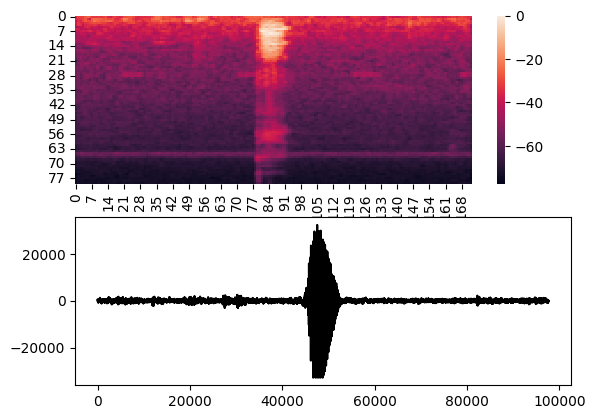

In [49]:
import seaborn as sns
plt.subplot(2,1,1)
sns.heatmap(f0)
plt.subplot(2,1,2)
plt.plot(np.squeeze(data),c='black')


In [7]:
HS = 76
input_path = "24414_wav\\HS"+str(HS)

for file in os.listdir(input_path):
    print(file[:-4])
    file = input_path + file

    break

HS76_overt_ba_0


In [16]:
from tqdm import *
import numpy as np
from scipy import interpolate
for  HS in [44,45,47,48,50,54,71]:
    input_path = "24414_wav\\HS"+str(HS)
    output_path = "spec\\HS"+str(HS)
    if not os.path.exists(output_path):
        os.mkdir(output_path)
        
    for file in os.listdir(input_path):
        if file.endswith(".wav"):
            print(file)
            file_save = file[:-4]+".npy"
            file = input_path +"\\"+ file
        
            rate, data = scio.wavfile.read(file, mmap=False)
            f0=wav2spec(data)
            import pylab as pl
            xnew=np.linspace(0,2,398)
            f_new = np.zeros([80,398])
            for i in range(80):
                f=interpolate.interp1d(np.linspace(0,2,f0.shape[1]),f0[i],kind='linear')
                #f是一个函数，用这个函数就可以找插值点的函数值了：
                f_new[i]=f(xnew)
            np.save(output_path+"\\"+file_save,f_new)

HS44_overt_ba_0.wav
567
HS44_overt_ba_1.wav
567
HS44_overt_ba_10.wav
567
HS44_overt_ba_11.wav
567
HS44_overt_ba_12.wav
567
HS44_overt_ba_13.wav
567
HS44_overt_ba_14.wav
567
HS44_overt_ba_15.wav
567
HS44_overt_ba_16.wav
567
HS44_overt_ba_17.wav
567
HS44_overt_ba_18.wav
567
HS44_overt_ba_19.wav
567
HS44_overt_ba_2.wav
567
HS44_overt_ba_20.wav
567
HS44_overt_ba_21.wav
567
HS44_overt_ba_22.wav
567
HS44_overt_ba_23.wav
567
HS44_overt_ba_24.wav
567
HS44_overt_ba_25.wav
567
HS44_overt_ba_26.wav
567
HS44_overt_ba_27.wav
567
HS44_overt_ba_28.wav
567
HS44_overt_ba_29.wav
567
HS44_overt_ba_3.wav
567
HS44_overt_ba_30.wav
567
HS44_overt_ba_31.wav
567
HS44_overt_ba_32.wav
567
HS44_overt_ba_33.wav
567
HS44_overt_ba_34.wav
567
HS44_overt_ba_35.wav
567
HS44_overt_ba_36.wav
567
HS44_overt_ba_37.wav
567
HS44_overt_ba_38.wav
567
HS44_overt_ba_39.wav
567
HS44_overt_ba_4.wav
567
HS44_overt_ba_40.wav
567
HS44_overt_ba_41.wav
567
HS44_overt_ba_42.wav
567
HS44_overt_ba_43.wav
567
HS44_overt_ba_44.wav
567
HS44_

In [17]:
input_path = "spec\\HS"+str(HS)
import numpy as np




import scipy.io as scio
import wave
import numpy as np
import os
import soundfile
for  HS in [44,45,47,48,50,54,71]:

    clean_path = "D:\\BaiduNetdiskDownload\\HS"+str(HS)+"\\result"
    
    mel_path = "spec\\HS"+str(HS)
    mel_con_path = "mel_dir"
    if HS < 70:
        sound_list = ["overt_ba","overt_da","overt_ga","overt_bu","overt_du","overt_gu"]
    else:
        sound_list = ["overt_ba","overt_da","overt_ga","overt_pa","overt_ta","overt_ka","overt_sa","overt_sha"]
    
    sound_title = "soundClipMat_"
    
    for file in os.listdir(clean_path):
        if file.startswith("HS"):
            if file.endswith(".mat"):
                print(file)
                file_one = scio.loadmat(os.path.join(clean_path,file))
                file_two = {}
                for sound_type in sound_list:
                    file_two[sound_title+sound_type] = np.zeros((file_one[sound_title+sound_type].shape[0],398,80))
                    for index in range(file_one[sound_title+sound_type].shape[0]):
                        melname = mel_path+"\\" + file[:4]+"_"+sound_type+"_"+str(index)+".npy"
                        temp = np.load(melname)
                        file_two[sound_title+sound_type][index] = temp.T
                hsblock = file[:4]+"mel.npy"
                np.save(mel_con_path+"\\"+hsblock,file_two)


HS44_Block_overt_covert.mat
HS45_Block_overt_covert.mat
HS47_Block_overt_covert.mat
HS48_Block_overt_covert.mat
HS50_Block_overt_covert.mat
HS54_Block_overt_covert.mat
HS71_Block_overt_covert.mat


In [21]:
def wav2mfcc(wavesig):
    wavetemp=np.squeeze(wavesig)
    convertedArray = wavetemp.astype(np.float)
    mfccs=librosa.feature.mfcc(y=convertedArray,sr=24414,n_mfcc=40)
    plt.figure(dpi=600)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title('MFCC')
    plt.colorbar(format='%+2.0f dB')
    return mfccs

def wav2mfcc_data(wav, sr=24414, num_mfcc=13, n_mels=40, n_fft=320):
    hop_length = n_fft//4
    wavetemp=np.squeeze(wav)
    convertedArray = wavetemp.astype(np.float)
    feat = librosa.feature.mfcc(y=convertedArray, sr=sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    return feat
f0=wav2mfcc_data(data)


C:\Users\DELL\AppData\Local\Temp\ipykernel_14964\1955559862.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  convertedArray = wavetemp.astype(np.float)


In [13]:

check_list = ['ECoG_covert_ga','ECoG_covert_gu']
color_list = ['r','b']
# color_list2 = ['r','g','b']
color_list2 = ['pink','lightblue']
ax_list = HS_elec_pos["HS"+str(HS)]

sig_test = []

fig, axs = plt.subplots(int(channel_num/8), 8, figsize=(12, int(channel_num*25/128)))



for i in range(int(channel_num/8)):
    for j in range(8):
        sig_test = []

        pidx = ax_list[i,j]
        a = ecogReading[check_list[0]][pidx]
        b = ecogReading[check_list[1]][pidx]
        if pidx in response_elecs_dict[check_list[0]]:
            plot_filled_sem(a[int(onset_time-forward):int(onset_time+backward),:], xvals, ax= axs[i,j] ,ylim=(-1, 1.5), color=color_list[0])
        else:
            plot_filled_sem(a[int(onset_time-forward):int(onset_time+backward),:], xvals, ax= axs[i,j] ,ylim=(-1, 1.5), color=color_list2[0])

        if pidx in response_elecs_dict[check_list[1]]:
            plot_filled_sem(b[int(onset_time-forward):int(onset_time+backward),:], xvals, ax= axs[i,j] ,ylim=(-1, 1.5), color=color_list[1])
        else:
            plot_filled_sem(b[int(onset_time-forward):int(onset_time+backward),:], xvals, ax= axs[i,j] ,ylim=(-1, 1.5), color=color_list2[1])

        df=pd.DataFrame(data={'xval':xvals,'oneway':(f_oneway(
            a[int(onset_time-forward):int(onset_time+backward),:][:, ~np.isnan(a).any(axis=0)].T,
            b[int(onset_time-forward):int(onset_time+backward),:][:, ~np.isnan(b).any(axis=0)].T).pvalue)})
        df_sig = df[df['oneway']<=threshold]
#         df_non = df[df['oneway']>threshold]



        ax=axs[i,j].twinx()
        ax=sns.scatterplot(x = df_sig['xval'],y = -0.3,lw = 2,color = 'black')
        ax.set_yticks([])
#         ax.set_ylim(-0.4,3.5)
        ax.set_ylim(-1,1.5)
        ax.text(0.55, 0.85, str(pidx), transform=ax.transAxes)

axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.set(yticklabels=[], xticklabels=[], xticks=[0,0.2,0.4,1])
    ax.grid(True)
axs[-16].set(yticks=[-1, 0, 1], yticklabels=[-1, 0, 1], xticklabels=[0, 0.2, 0.4, 1], xlabel="Time (s)", ylabel="High-gamma \n(z-score across block)")

plt.show()


4.0